<a href="https://colab.research.google.com/github/JasmineGonzalez2021/Computational-Modeling/blob/master/Jasmine's_Q2_Data_Journalism_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This data journalism project examines the ways in which guns, gun deaths, and gun violence affect varying US populations differently. It also looks at potential predictors of gun violence and their statistical correlation with it. 

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from urllib.request import urlopen
good_data = pd.read_csv("https://raw.githubusercontent.com/JasmineGonzalez2021/Computational-Modeling/master/guns.csv")
good_data

,Unnamed: 0,year,month,intent,police,sex,age,race,hispanic,place,education
0,1,2012,1,Suicide,0,M,34.0,Asian/Pacific Islander,100,Home,4.0
1,2,2012,1,Suicide,0,F,21.0,White,100,Street,3.0
2,3,2012,1,Suicide,0,M,60.0,White,100,Other specified,4.0
3,4,2012,2,Suicide,0,M,64.0,White,100,Home,4.0
4,5,2012,2,Suicide,0,M,31.0,White,100,Other specified,2.0
...,...,...,...,...,...,...,...,...,...,...,...
100793,100794,2014,12,Homicide,0,M,36.0,Black,100,Home,2.0
100794,100795,2014,12,Homicide,0,M,19.0,Black,100,Street,2.0
100795,100796,2014,12,Homicide,0,M,20.0,Black,100,Street,2.0
100796,100797,2014,12,Homicide,0,M,22.0,Hispanic,260,Street,1.0


The abbreviated dataset, shown above, is [data from Kaggle](https://www.kaggle.com/hakabuk/gun-deaths-in-the-us/data) that summarizes basic information about all of the people in the US that suffered deaths at the hands of guns from 2012 to 2014.

# Gun Deaths by Intent

<BarContainer object of 5 artists>

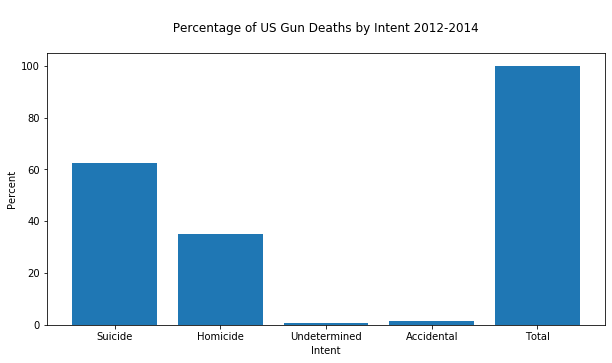

In [0]:
def count_intent(bigset):
  suicideCount = 0
  homicideCount = 0
  undeterminedCount = 0
  accidentalCount = 0
  for entry in bigset:
    if entry == "Suicide":
      suicideCount = suicideCount + 1
    if entry == "Homicide":
      homicideCount = homicideCount + 1
    if entry == "Undetermined":
      undeterminedCount = undeterminedCount + 1
    if entry == "Accidental":
      accidentalCount = accidentalCount + 1
  totalCount = suicideCount + homicideCount + undeterminedCount + accidentalCount 
  percSuicide = round((suicideCount/totalCount * 100),2)
  percHomicide = round((homicideCount/totalCount * 100), 2)
  percUndetermined = round((undeterminedCount/totalCount * 100),2)
  percAccidental = round((accidentalCount/totalCount * 100),2)
  percTotal = round(100, 2)
  intents = ['Suicide', 'Homicide', 'Undetermined', 'Accidental', 'Total']
  intentPercents = [percSuicide, percHomicide, percUndetermined, percAccidental, percTotal]
  intentPlot = plt.bar(intents, intentPercents)
  plt.xlabel("Intent")
  plt.ylabel("Percent")
  return intentPlot

plt.figure(figsize = (10,5))
plt.title('\n Percentage of US Gun Deaths by Intent 2012-2014 \n')
count_intent(good_data['intent'])

The bar graph above demonstrates that the majority of gun deaths in the US from 2012 to 2014 were suicides. This is interesting because many people see gun violence as a threat to the livelihood of themselves, their friends, and their family members, but do not consider the ability of guns to help a person commit suicide without necessarily perpretrating violence agaisnt others.

# Gun Deaths by Race

(<BarContainer object of 6 artists>, [1.32, 23.11, 8.95, 0.91, 65.71, 100])

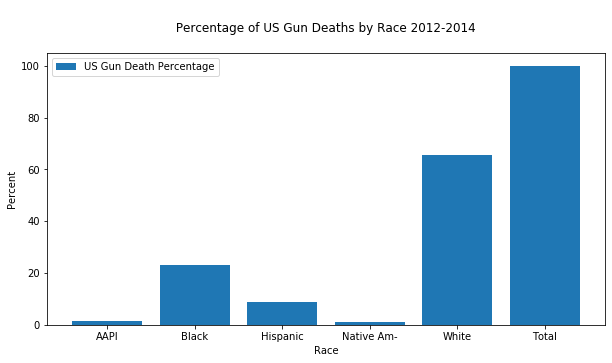

In [0]:
def count_races(smallset, arg):
  blackCount = 0
  whiteCount = 0
  hispanicCount = 0
  NACount = 0
  AAPICount = 0
  for item in smallset['race']:
    if item == "Black":
      blackCount = blackCount + 1
    if item == "White":
      whiteCount = whiteCount + 1
    if item == "Hispanic":
      hispanicCount = hispanicCount + 1
    if item == "Native American/Native Alaskan":
      NACount = NACount + 1
    if item  == "Asian/Pacific Islander":
      AAPICount = AAPICount + 1
    if item != "Black" and item != "White" and item != "Hispanic" and item != "Native American/Native Alaskan" and item != "Asian/Pacific Islander":
      print(item)
  #return blackCount, whiteCount, hispanicCount, NACount, AAPICount
  totalCount = blackCount + whiteCount + hispanicCount + NACount + AAPICount 
  percBlack = round((blackCount/totalCount * 100),2)
  percWhite = round((whiteCount/totalCount * 100), 2)
  percHispanic = round((hispanicCount/totalCount * 100),2)
  percNA = round((NACount/totalCount * 100),2)
  percAAPI = round((AAPICount/totalCount * 100),2)
  percTotal = round(100, 2)
  races = ['AAPI', 'Black', 'Hispanic', 'Native Am-', 'White','Total']
  racePercents = [percAAPI, percBlack, percHispanic, percNA, percWhite, percTotal]
  racePlot = plt.bar(races, racePercents, label='US Gun Death' + str(arg) + 'Percentage')
  plt.legend()
  plt.xlabel("Race")
  plt.ylabel("Percent")
  return racePlot, racePercents

plt.figure(figsize = (10,5))
plt.title('\n Percentage of US Gun Deaths by Race 2012-2014 \n')
count_races(good_data[['race']], " ")

The data shown above is particularly interesting because while Black people account for only 14.0% of the US population, according to this data set, they made up 23.1% of all gun deaths from 2012 - 2014. Similarly, white people make up 62.6% of the US population, but represent 65.7% of the total gun deaths shown here. In contrast, Asian Americans, Hispanics, and Native Americans make up 5.6%, 16.7%, and 1.6% of the total US population, respetively. However, their gun deaths in 2012-2014 only accounted for 1.3%, 9.0%, and 0.9% of the total, respectively. The graph belows demonstrates this visually. 

The information on US racial demographics comes from the following websites:

1) [Asian American Demographic Information](https://en.wikipedia.org/wiki/Asian_Americans)

2) [Black Demographic Information](https://en.wikipedia.org/wiki/Race_and_ethnicity_in_the_United_States)

3) [Hispanic Demographic Information](https://en.wikipedia.org/wiki/Demographics_of_Hispanic_and_Latino_Americans)

4) [Native American Demographic Information](https://en.wikipedia.org/wiki/Modern_social_statistics_of_Native_Americans)

5) [White Demographic Information](https://en.wikipedia.org/wiki/Demography_of_the_United_States)

(<BarContainer object of 6 artists>,
 <BarContainer object of 6 artists>,
 [1.32, 23.11, 8.95, 0.91, 65.71, 100])

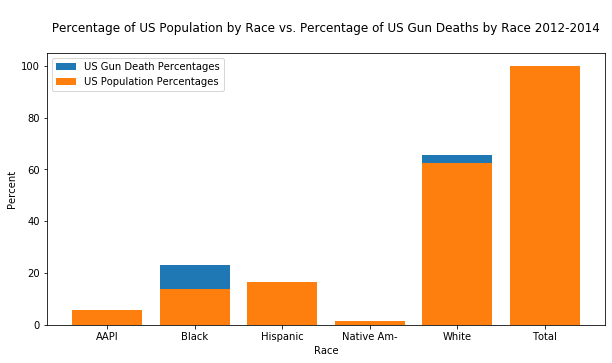

In [0]:
def act_races(data, arg):
  blackCount = 0
  whiteCount = 0
  hispanicCount = 0
  NACount = 0
  AAPICount = 0
  for item in data['race']:
    if item == "Black":
      blackCount = blackCount + 1
    if item == "White":
      whiteCount = whiteCount + 1
    if item == "Hispanic":
      hispanicCount = hispanicCount + 1
    if item == "Native American/Native Alaskan":
      NACount = NACount + 1
    if item  == "Asian/Pacific Islander":
      AAPICount = AAPICount + 1
    if item != "Black" and item != "White" and item != "Hispanic" and item != "Native American/Native Alaskan" and item != "Asian/Pacific Islander":
      print(item)
  #return blackCount, whiteCount, hispanicCount, NACount, AAPICount
  totalCount = blackCount + whiteCount + hispanicCount + NACount + AAPICount 
  percBlack = round((blackCount/totalCount * 100),2)
  percWhite = round((whiteCount/totalCount * 100), 2)
  percHispanic = round((hispanicCount/totalCount * 100),2)
  percNA = round((NACount/totalCount * 100),2)
  percAAPI = round((AAPICount/totalCount * 100),2)
  percTotal = round(100, 2)
  races = ['AAPI', 'Black', 'Hispanic', 'Native Am-', 'White','Total']
  racePercents = [percAAPI, percBlack, percHispanic, percNA, percWhite, percTotal]
  actBlack = 14.00
  actWhite = 62.60
  actAAPI = 5.60
  actHispanic = 16.70
  actNA  = 1.60
  actTotal = 100
  actRacePercents = [actAAPI, actBlack, actHispanic, actNA, actWhite, actTotal]
  racePlot = plt.bar(races, racePercents, label='US Gun Death' + str(arg) + 'Percentages')
  actRacePlot = plt.bar(races, actRacePercents, label='US Population Percentages')
  plt.legend()
  plt.xlabel("Race")
  plt.ylabel("Percent")
  return racePlot, actRacePlot, racePercents 

plt.figure(figsize = (10,5))
plt.title('\n Percentage of US Population by Race vs. Percentage of US Gun Deaths by Race 2012-2014 \n')
act_races(good_data[['race']], " ")

What long term effects do these drastic descrepancies have for both the black and white populations?

According to a study described [here](https://www.bu.edu/sph/2018/12/04/gun-deaths-have-taken-2-5-years-off-us-life-expectancy/) as well as the data above, African Americans are relatively likely to be shot and killed. This fact results in a decreased life expenctancy for many African Americans, as they lose a large portion of their lives if they are killed young due to gun violence.

# Suicides and Homicides by Race

The code below looks at gun deaths in the US resulting from suicide and homicide by race, which helps illuminate some of the discrepencies above for both black and white people in terms of their percentage of US gun deaths from 2012-2014 versus their US population percentage.

In [0]:
justHomicide = good_data.loc[good_data['intent'] == 'Homicide']
justSuicide = good_data.loc[good_data['intent'] == 'Suicide']

Text(0.5, 1.0, 'Percentage of US Gun Deaths from Homicide by Race 2012-2014')

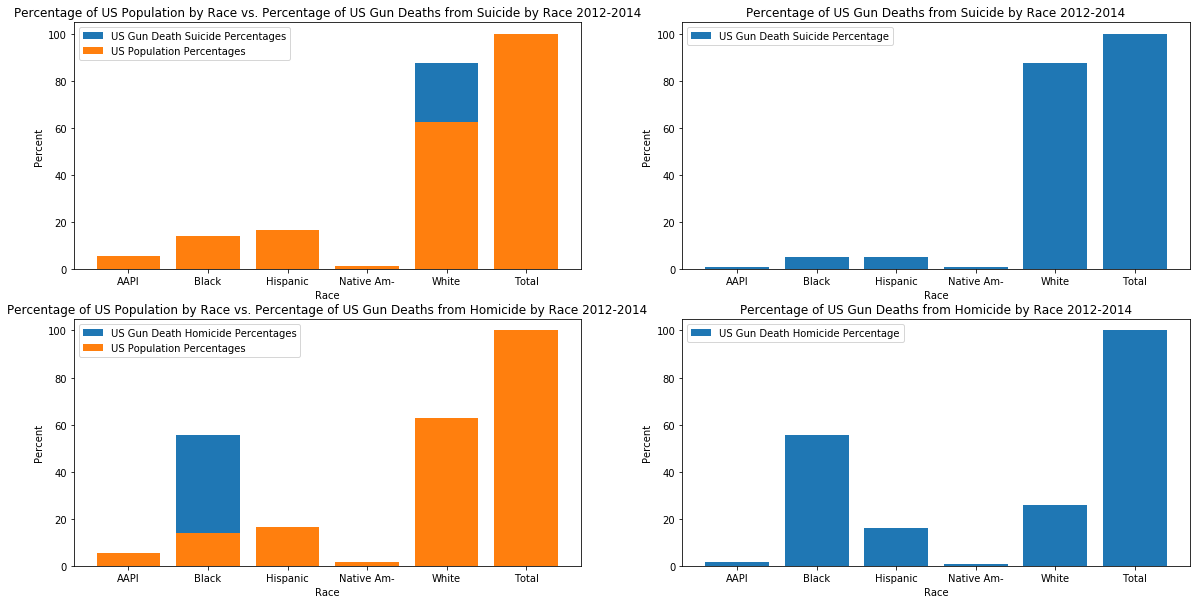

In [0]:
plt.figure(figsize = (20,10))
plt.title("?")
plt.subplot(2,2,1); act_races(justSuicide, " Suicide "); plt.title("Percentage of US Population by Race vs. Percentage of US Gun Deaths from Suicide by Race 2012-2014")
plt.subplot(2,2,2); count_races(justSuicide, " Suicide "); plt.title("Percentage of US Gun Deaths from Suicide by Race 2012-2014")
plt.subplot(2,2,3); act_races(justHomicide, " Homicide ");  plt.title("Percentage of US Population by Race vs. Percentage of US Gun Deaths from Homicide by Race 2012-2014")
plt.subplot(2,2,4); count_races(justHomicide, " Homicide "); plt.title("Percentage of US Gun Deaths from Homicide by Race 2012-2014")

These data show that a disproportionate number of black people died as a result of gun violence between 2012 and 2014; the graph above shows that black people were the victims of more than half of all homicide deaths. In contrast, as noted above, less than a quarter of the US is black. Similarly, white people account for a disproportionate number of the deaths resulting from suicide using guns. About 90% of suicides by gun were committed by white people from 2012-2014, but they only make up about 60% of the population,  a difference of roughly 30%.

# Gun Deaths by Sex

(<BarContainer object of 2 artists>, [14.33, 85.67])

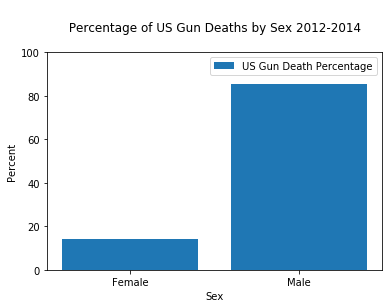

In [0]:
def count_sexes(dataframe):
  femaleCount = 0
  maleCount = 0
  for item in dataframe['sex']:
    if item == "F":
      femaleCount = femaleCount + 1
    if item == "M":
      maleCount = maleCount + 1    
    if item != "F" and item != "M":
      print(item)
  totalCount = femaleCount + maleCount + 1 - 1
  percFemale = round((femaleCount/totalCount * 100),2)
  percMale = round((maleCount/totalCount * 100), 2)
  sexes = ['Female', 'Male']
  sexPercents = [percFemale, percMale]
  sexPlot = plt.bar(sexes, sexPercents, label='US Gun Death Percentage')
  plt.ylim(0,100)
  plt.legend()
  plt.xlabel('Sex')
  plt.ylabel('Percent')
  plt.title('\n Percentage of US Gun Deaths by Sex 2012-2014 \n')
  return sexPlot, sexPercents
count_sexes(good_data[['sex']])

According to [this](https://www.census.gov/prod/cen2010/briefs/c2010br-03.pdf) census from the US government, roughly 51% of the country's population is female, while 49% of the country's population is male. This means that since over 80% of the gun deaths from the used dataset are male, gun violence is an issue which disproportionately affects men in the United States.

# Gun Violence vs. Gun Ownership by State

The below information was synthesized based on [this](https://www.kaggle.com/solorzano/gun-ownership-by-state) source which lists the number of guns registered in each state as well as a subsection of [this](https://www.kaggle.com/jameslko/gun-violence-data) dataset which records incidents of gun violence in the US from 2013-2018 with details including location by state. Only incidents from the year 2014 in the second dataset were used to generate the information below as the whole dataset was too large to upload to github for easier access. Furthermore, not all of the incidents of gun violence in that dataset resulted in death.

In [0]:
gun_ownership= pd.read_csv("https://raw.githubusercontent.com/JasmineGonzalez2021/Computational-Modeling/master/raw-thoughtco-guns-by-state.txt", sep="\t")
guns_registered = gun_ownership[['State', '# of guns registered']]
guns_registered.columns = ['state', '# of guns registered']


df  = pd.read_csv("https://raw.githubusercontent.com/JasmineGonzalez2021/Computational-Modeling/master/gun-violence-data_01-2013_03-2018.csv")
rows = df[0:51854]
gun_deaths = rows[["incident_id", "date", "state", "n_killed" ]]
states_deaths = gun_deaths.groupby('state').count()
states_deaths = states_deaths[['incident_id']]
states_deaths.columns = ['# of incidents of gun violence in 2014']
states = states_deaths.index.values
states[8] = "Washington D.C."

final_data = states_deaths.merge(guns_registered, left_on='state', right_on='state')
final_data

,state,# of incidents of gun violence in 2014,# of guns registered
0,Alabama,1318,"161,641"
1,Alaska,146,"15,824"
2,Arizona,556,"179,738"
3,Arkansas,572,"79,841"
4,California,3732,"344,622"
5,Colorado,556,"92,435"
6,Connecticut,583,"82,400"
7,Delaware,493,"4,852"
8,Washington D.C.,838,"47,228"
9,Florida,3138,"343,288"


The above chart details the number of incidents of gun violence in 2014 in each US state as well as the District of Columbia. It synthesizes that information with the number of guns registered in each state and Washington D.C. using a dataframe merging technique. A graph of this information is included below the following code.

Text(0.5, 1.0, '\n Correlation between Number of Guns Registered in each State and Incidents of Gun Violence in 2014 \n')

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


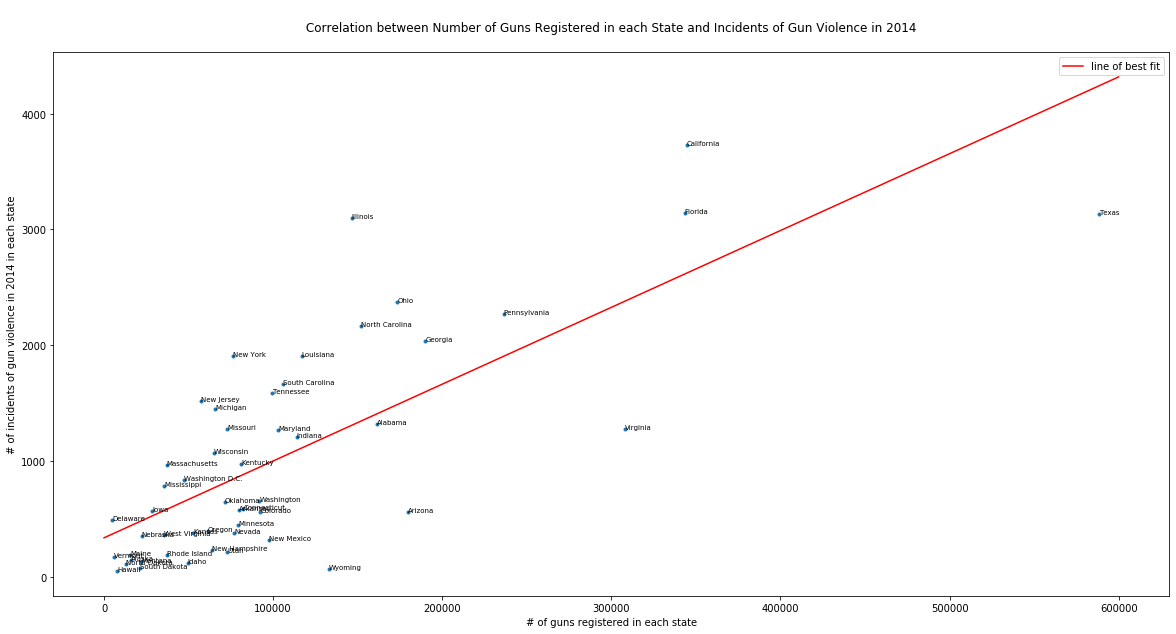

In [0]:
X = final_data['# of guns registered'].str.replace(',','').astype(float).values
Y = final_data['# of incidents of gun violence in 2014']
states = final_data['state']
output = np.polyfit(X, Y, 1)
reg_line = output[1] + output[0]*np.arange(0,600000,.1)
plt.figure(figsize = (20,10))
plt.plot(np.arange(0,600000,.1), reg_line, 'r', label='line of best fit')
plt.legend()
plt.plot(X,Y, ".")
for i, txt in enumerate(states):
    plt.annotate(txt, (X[i], Y[i]), fontsize=7)
    
plt.xlabel('# of guns registered in each state')
plt.ylabel('# of incidents of gun violence in 2014 in each state')
plt.title('\n Correlation between Number of Guns Registered in each State and Incidents of Gun Violence in 2014 \n')

Since this graph is a linear regression, which basically means it examines the relationship between two variables, we can calculate how well the independent variable here (number of guns registered in a state) predicts the dependent one (number of incidents of gun violence in 2014 in each state) using a value called the R^2 of the data. The code below calculates this for us.

In [0]:
ssTot = np.sum((Y-np.mean(Y))**2)
ssRes = np.sum((Y - (output[0]*X + output[1]))**2)
r2 = 1 - (ssRes/ssTot)
r2

0.5662761450223167

This tells us that the R^2 of the data is 0.5662761450223167. Since that probably doesn't mean much to most of the people reading this, let's explain that number in simpler terms. Rounding the R^2 to a few decimal places, multiplying by 100, and adding a percent sign tells us that 56.63% of the y-axis variation can be explained with the x-axis variation. In essence, this means that in 2014, there was a modest correlation between the number of guns registered in each state and the number of incidents of gun violence in that same state. An interesting conclusion can be drawn and more easily observed by zooming in on the bottom left portion of the above graph of that correlation.

Text(0.5, 1.0, '\n Correlation between Number of Guns Registered in each State and Incidents of Gun Violence in 2014 \n')

/usr/local/lib/python3.6/dist-packages/IPython/core/pylabtools.py:125: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


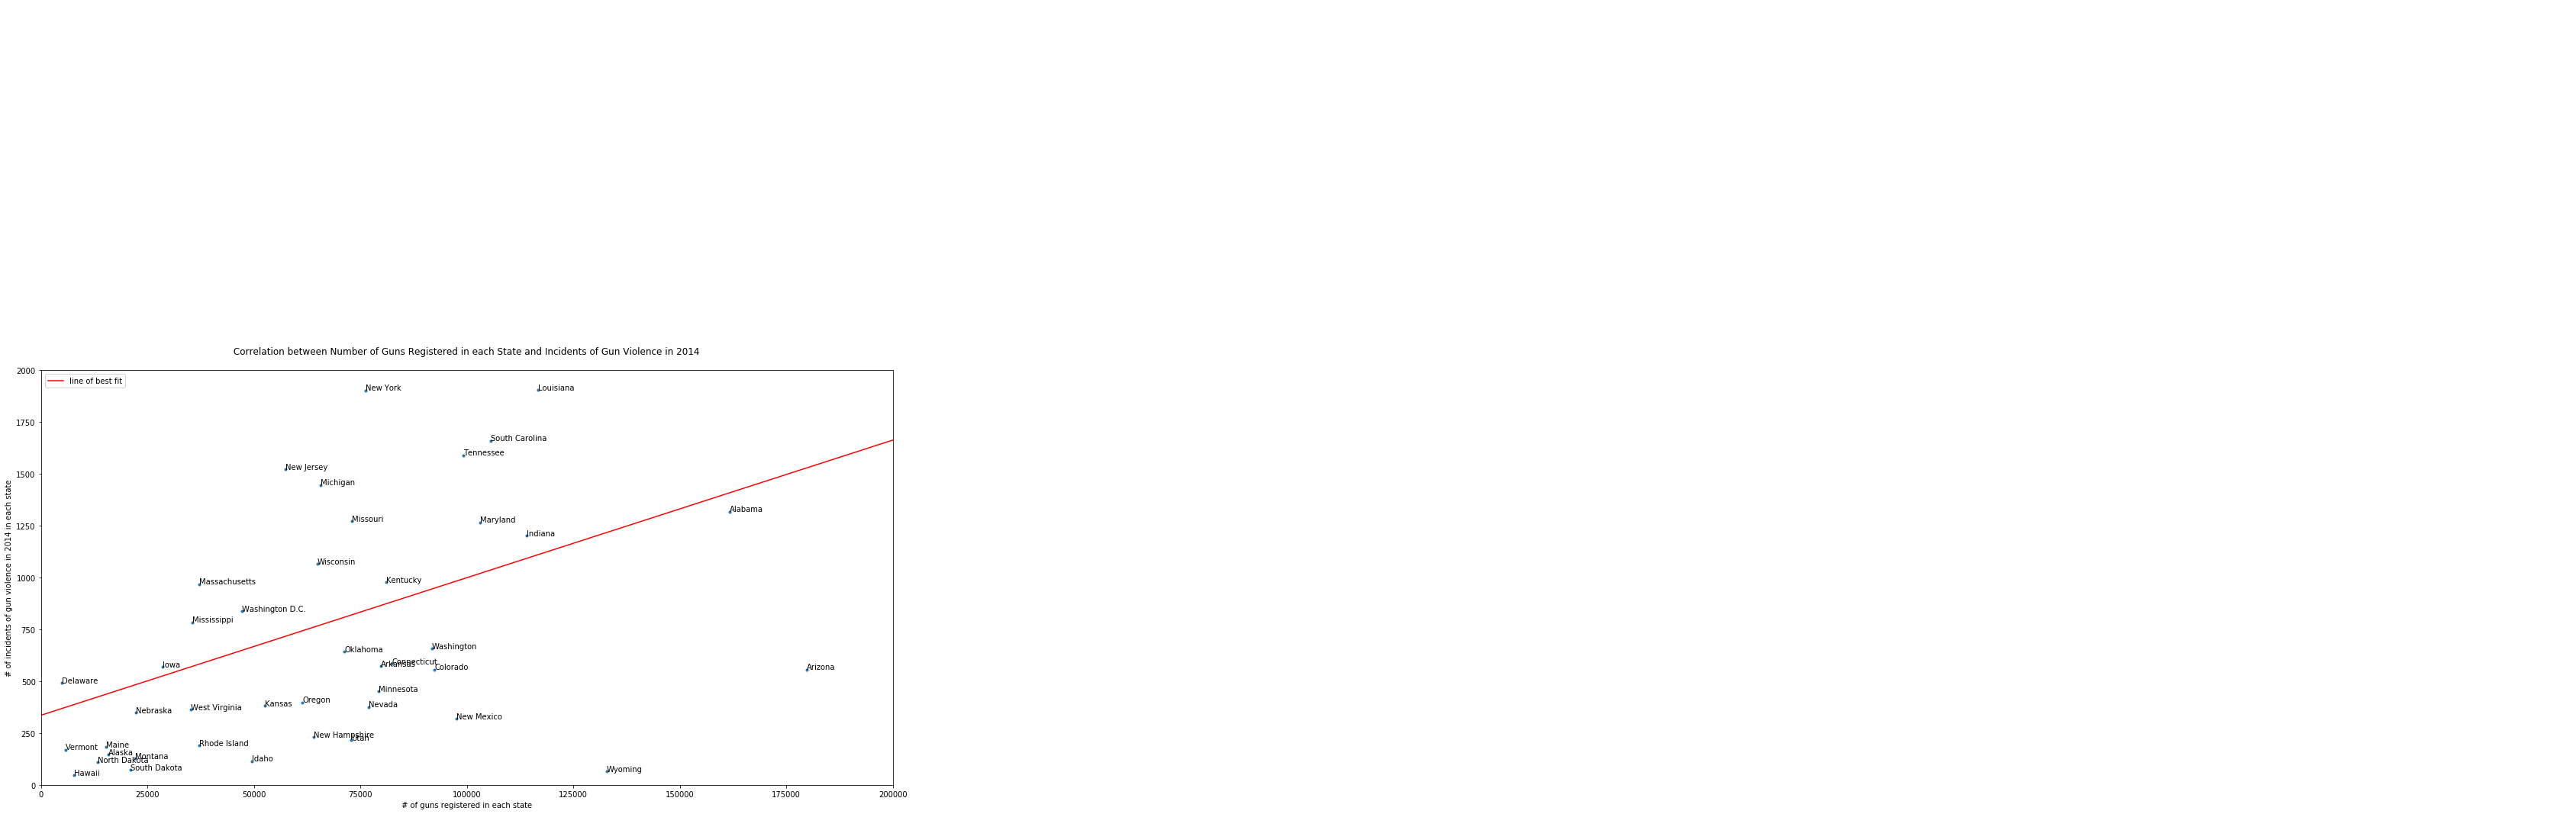

In [0]:
plt.figure(figsize = (20,10))
plt.plot(np.arange(0,600000,.1), reg_line, 'r', label='line of best fit')
plt.legend()
plt.plot(X,Y, ".")
plt.ylim(0, 2000)
plt.xlim(0, 200000)
for i, txt in enumerate(states):
    plt.annotate(txt, (X[i], Y[i]))
plt.xlabel('# of guns registered in each state')
plt.ylabel('# of incidents of gun violence in 2014 in each state')
plt.title('\n Correlation between Number of Guns Registered in each State and Incidents of Gun Violence in 2014 \n')

The slope of the line of best fit in this zoomed in graph shows that for about every 100 guns in a state/region, there was one incident of gun violence in 2014. For example, the point (100000 guns, 1000 incidents of gun violence) would not fall too far off the line of best fit for this graph, and 100000/1000 = 100.